# - VGGNet(VGG16)

In [2]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img_dir = 'Images3'
categories = os.listdir(img_dir)
num_classes = len(categories)

In [4]:
image_w = 224
image_h = 224

In [5]:
X = []
y = []

for index, breed in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[index] = 1

    image_dir = img_dir + "/" + breed
    files = glob.glob(image_dir+"/*.jpg")
    print(index, ")", breed, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

0 ) n02085620-Chihuahua  파일 길이 :  152
1 ) n02085782-Japanese_spaniel  파일 길이 :  185
2 ) n02085936-Maltese_dog  파일 길이 :  252
3 ) n02086079-Pekinese  파일 길이 :  149
4 ) n02086240-Shih-Tzu  파일 길이 :  214
5 ) n02086646-Blenheim_spaniel  파일 길이 :  188
6 ) n02086910-papillon  파일 길이 :  196
7 ) n02088364-beagle  파일 길이 :  195
8 ) n02088466-bloodhound  파일 길이 :  187
9 ) n02089078-black-and-tan_coonhound  파일 길이 :  159
10 ) n02089867-Walker_hound  파일 길이 :  153
11 ) n02089973-English_foxhound  파일 길이 :  157
12 ) n02091032-Italian_greyhound  파일 길이 :  182
13 ) n02091134-whippet  파일 길이 :  187
14 ) n02093256-Staffordshire_bullterrier  파일 길이 :  155
15 ) n02093647-Bedlington_terrier  파일 길이 :  182
16 ) n02094258-Norwich_terrier  파일 길이 :  185
17 ) n02094433-Yorkshire_terrier  파일 길이 :  164
18 ) n02096294-Australian_terrier  파일 길이 :  196
19 ) n02096585-Boston_bull  파일 길이 :  182
20 ) n02097047-miniature_schnauzer  파일 길이 :  154
21 ) n02097209-standard_schnauzer  파일 길이 :  155
22 ) n02097658-silky_terrier  파일 길이 :  183

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
n = np.arange(X.shape[0])
np.random.seed(0)
np.random.shuffle(n)

In [25]:
X = X[n]
y = y[n]

In [26]:
print("Images shape after shuffling = ",X.shape,"\nLabels shape after shuffling = ",y.shape)

Images shape after shuffling =  (11411, 224, 224, 3) 
Labels shape after shuffling =  (11411, 65)


In [27]:
X = X.astype(np.float32)
y = y.astype(np.int32)
X = X/255.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [29]:
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (8215, 224, 224, 3)
y_train shape =  (8215, 65)

x_val shape =  (913, 224, 224, 3)
y_val shape =  (913, 65)

x_test shape =  (2283, 224, 224, 3)
y_test shape =  (2283, 65)


In [30]:
image_generator = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    zoom_range = 0.25,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

In [31]:
image_generator.fit(x_train)

In [32]:
model = Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(image_w,image_h,3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(65, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 58, 58, 128)      

In [33]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
K.set_value(model.optimizer.learning_rate, 0.0001)

In [34]:
early_stopping= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 15)
model_checkPoint = ModelCheckpoint('VGGNet.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [35]:
history = model.fit(image_generator.flow(x_train, y_train, batch_size=128), steps_per_epoch=x_train.shape[0]/200, epochs=150, shuffle=True, callbacks=[early_stopping, model_checkPoint], validation_data=(x_val, y_val))

Epoch 1/150
42/41 [==============================] - ETA: -10s - loss: 4.1727 - accuracy: 0.0184
Epoch 00001: val_loss improved from inf to 4.16982, saving model to VGGNet.h5
42/41 [==============================] - 519s 12s/step - loss: 4.1727 - accuracy: 0.0184 - val_loss: 4.1698 - val_accuracy: 0.0241
Epoch 2/150
42/41 [==============================] - ETA: -10s - loss: 4.1674 - accuracy: 0.0159
Epoch 00002: val_loss improved from 4.16982 to 4.16629, saving model to VGGNet.h5
42/41 [==============================] - 520s 12s/step - loss: 4.1674 - accuracy: 0.0159 - val_loss: 4.1663 - val_accuracy: 0.0153
Epoch 3/150
42/41 [==============================] - ETA: -10s - loss: 4.1618 - accuracy: 0.0236
Epoch 00003: val_loss improved from 4.16629 to 4.15459, saving model to VGGNet.h5
42/41 [==============================] - 514s 12s/step - loss: 4.1618 - accuracy: 0.0236 - val_loss: 4.1546 - val_accuracy: 0.0263
Epoch 4/150
42/41 [==============================] - ETA: -10s - loss: 4.1

Epoch 28/150
42/41 [==============================] - ETA: -10s - loss: 3.9916 - accuracy: 0.0476
Epoch 00028: val_loss improved from 3.92340 to 3.92060, saving model to VGGNet.h5
42/41 [==============================] - 500s 12s/step - loss: 3.9916 - accuracy: 0.0476 - val_loss: 3.9206 - val_accuracy: 0.0657
Epoch 29/150
42/41 [==============================] - ETA: -10s - loss: 4.0017 - accuracy: 0.0518
Epoch 00029: val_loss improved from 3.92060 to 3.91417, saving model to VGGNet.h5
42/41 [==============================] - 529s 13s/step - loss: 4.0017 - accuracy: 0.0518 - val_loss: 3.9142 - val_accuracy: 0.0613
Epoch 30/150
42/41 [==============================] - ETA: -10s - loss: 3.9860 - accuracy: 0.0545
Epoch 00030: val_loss did not improve from 3.91417
42/41 [==============================] - 497s 12s/step - loss: 3.9860 - accuracy: 0.0545 - val_loss: 3.9176 - val_accuracy: 0.0701
Epoch 31/150
42/41 [==============================] - ETA: -10s - loss: 3.9903 - accuracy: 0.0529


42/41 [==============================] - ETA: -10s - loss: 3.9368 - accuracy: 0.0554
Epoch 00056: val_loss improved from 3.86812 to 3.85415, saving model to VGGNet.h5
42/41 [==============================] - 500s 12s/step - loss: 3.9368 - accuracy: 0.0554 - val_loss: 3.8542 - val_accuracy: 0.0701
Epoch 57/150
42/41 [==============================] - ETA: -10s - loss: 3.9333 - accuracy: 0.0588
Epoch 00057: val_loss improved from 3.85415 to 3.84964, saving model to VGGNet.h5
42/41 [==============================] - 492s 12s/step - loss: 3.9333 - accuracy: 0.0588 - val_loss: 3.8496 - val_accuracy: 0.0843
Epoch 58/150
42/41 [==============================] - ETA: -10s - loss: 3.9255 - accuracy: 0.0641
Epoch 00058: val_loss did not improve from 3.84964
42/41 [==============================] - 485s 12s/step - loss: 3.9255 - accuracy: 0.0641 - val_loss: 3.8516 - val_accuracy: 0.0668
Epoch 59/150
42/41 [==============================] - ETA: -10s - loss: 3.9324 - accuracy: 0.0567
Epoch 00059: 

Epoch 84/150
42/41 [==============================] - ETA: -10s - loss: 3.8623 - accuracy: 0.0694
Epoch 00084: val_loss did not improve from 3.78685
42/41 [==============================] - 492s 12s/step - loss: 3.8623 - accuracy: 0.0694 - val_loss: 3.8015 - val_accuracy: 0.0832
Epoch 85/150
42/41 [==============================] - ETA: -10s - loss: 3.8638 - accuracy: 0.0723
Epoch 00085: val_loss did not improve from 3.78685
42/41 [==============================] - 484s 12s/step - loss: 3.8638 - accuracy: 0.0723 - val_loss: 3.7894 - val_accuracy: 0.0811
Epoch 86/150
42/41 [==============================] - ETA: -10s - loss: 3.8722 - accuracy: 0.0696
Epoch 00086: val_loss did not improve from 3.78685
42/41 [==============================] - 496s 12s/step - loss: 3.8722 - accuracy: 0.0696 - val_loss: 3.8005 - val_accuracy: 0.0690
Epoch 87/150
42/41 [==============================] - ETA: -10s - loss: 3.8725 - accuracy: 0.0656
Epoch 00087: val_loss did not improve from 3.78685
42/41 [====

Epoch 112/150
42/41 [==============================] - ETA: -10s - loss: 3.7972 - accuracy: 0.0791
Epoch 00112: val_loss did not improve from 3.71976
42/41 [==============================] - 483s 12s/step - loss: 3.7972 - accuracy: 0.0791 - val_loss: 3.7214 - val_accuracy: 0.1030
Epoch 113/150
42/41 [==============================] - ETA: -10s - loss: 3.7984 - accuracy: 0.0766
Epoch 00113: val_loss did not improve from 3.71976
42/41 [==============================] - 493s 12s/step - loss: 3.7984 - accuracy: 0.0766 - val_loss: 3.7259 - val_accuracy: 0.1051
Epoch 114/150
42/41 [==============================] - ETA: -10s - loss: 3.7964 - accuracy: 0.0742
Epoch 00114: val_loss did not improve from 3.71976
42/41 [==============================] - 485s 12s/step - loss: 3.7964 - accuracy: 0.0742 - val_loss: 3.7358 - val_accuracy: 0.1008
Epoch 115/150
42/41 [==============================] - ETA: -10s - loss: 3.7924 - accuracy: 0.0761
Epoch 00115: val_loss improved from 3.71976 to 3.71423, sa

Epoch 140/150
42/41 [==============================] - ETA: -10s - loss: 3.7309 - accuracy: 0.0837
Epoch 00140: val_loss did not improve from 3.66029
42/41 [==============================] - 494s 12s/step - loss: 3.7309 - accuracy: 0.0837 - val_loss: 3.6695 - val_accuracy: 0.1150
Epoch 141/150
42/41 [==============================] - ETA: -10s - loss: 3.7268 - accuracy: 0.0863
Epoch 00141: val_loss did not improve from 3.66029
42/41 [==============================] - 498s 12s/step - loss: 3.7268 - accuracy: 0.0863 - val_loss: 3.6637 - val_accuracy: 0.1095
Epoch 142/150
42/41 [==============================] - ETA: -10s - loss: 3.7323 - accuracy: 0.0865
Epoch 00142: val_loss did not improve from 3.66029
42/41 [==============================] - 496s 12s/step - loss: 3.7323 - accuracy: 0.0865 - val_loss: 3.6698 - val_accuracy: 0.1161
Epoch 143/150
42/41 [==============================] - ETA: -11s - loss: 3.7235 - accuracy: 0.0891
Epoch 00143: val_loss did not improve from 3.66029
42/41 [

In [36]:
model.load_weights('VGGNet.h5')

In [37]:
loss, accuracy = model.evaluate(x_test, y_test)

print('\nLoss: {:.4f}, Acc: {:.4f}'.format(loss, accuracy))

72/72 [==============================] - 49s 684ms/step - loss: 3.6387 - accuracy: 0.1095

Loss: 3.6387, Acc: 0.1095


In [38]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

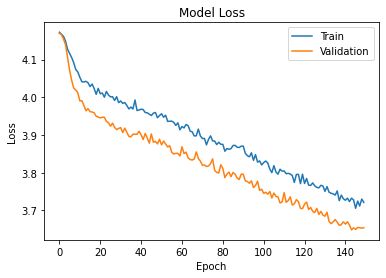

In [39]:
plot_loss(history)
plt.show()

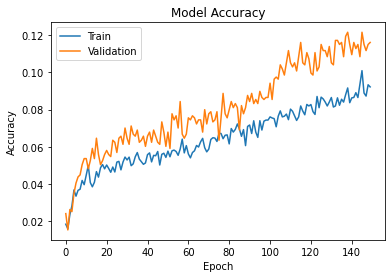

In [40]:
plot_acc(history)
plt.show()

In [41]:
predictions = model.predict(x_test)

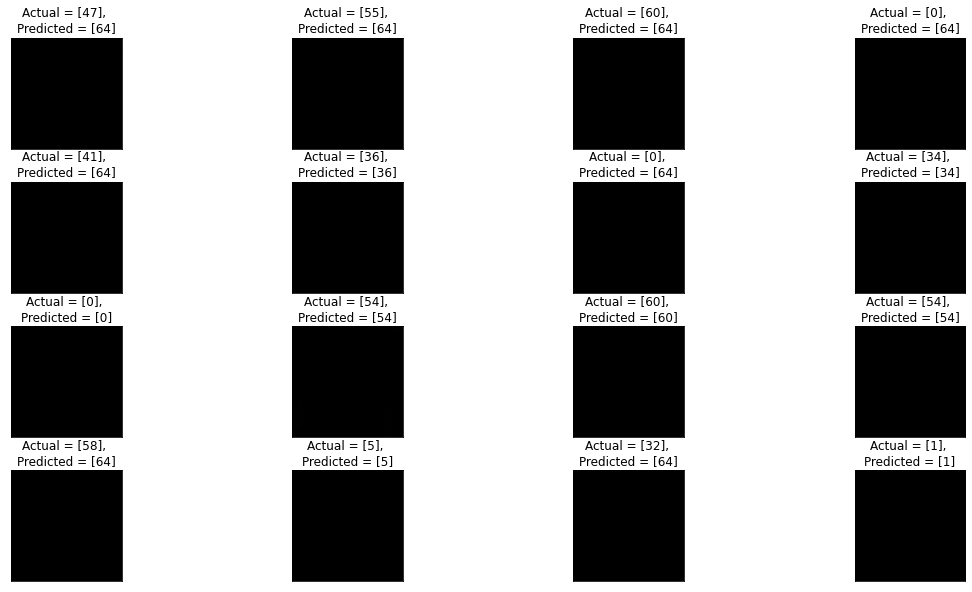

In [43]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(16):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(4, 4, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, \nPredicted = {}'.format(np.argpartition(y_test[r[0]],-1)[-1:] , np.argpartition(predictions[r[0]][y_test[r[0]]],-1)[-1:]))
    plt.xticks([]) , plt.yticks([])

plt.show()